In [2]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import os

print("\n matplotlib version: {}".format(matplotlib.__version__),
      "\n pandas version{}".format(pd.__version__))




 matplotlib version: 3.3.3 
 pandas version1.1.5


### Task 1: Merging 12 csvs into a single file dataframe

In [3]:
path = "./Sales_Data"
csvs = [file for file in os.listdir(path) if not file.startswith('.')]

year_df = pd.DataFrame()

for csv in csvs:
    current_data = pd.read_csv(os.path.join(path, csv))
    year_df = pd.concat([year_df, current_data])

year_df.to_csv('All_year_copy.csv', index=False)

display(year_df)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


###  Task 2: Clean up!

First step Remove all nan row in the Dataframe.

In [4]:

all_data = pd.read_csv('All_year_copy.csv')
len(all_data.index) # --Before

186850

In [5]:
nan_df  = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
all_data = all_data.dropna()
display(len(all_data.index)) # --After

186305

In [7]:
all_data['Month'] = all_data['Order Date'].str[0:2]

not_int = all_data[all_data['Month'] == 'Or'].index 
all_data.drop(not_int, inplace=True)
all_data['Month'] = all_data['Month'].astype('int32')

all_data.head()



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Task 3: Found the what was the best month for sales


In [8]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
display(all_data)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


In [9]:
result = all_data.groupby('Month').sum()
result

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


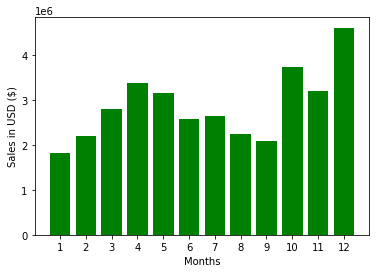

In [10]:
months = range(1, 13)

plt.bar(months, result['Sales'], color='GREEN')
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales in USD ($)')
plt.show()

### Task 4: What city sold the most product?

In [11]:
def get_city(adress):
    return adress.split(',')[1]
def get_state(adress):
    return adress.split(',')[2].split(' ')[1]



all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
result = all_data.groupby('City').sum()
display(result)


,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


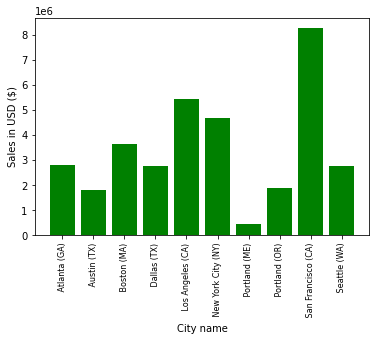

In [12]:
cities = result.index


plt.bar(cities, result['Sales'], color='GREEN')
plt.xticks(cities, size=8, rotation='vertical',)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City name')
plt.show()


### Task 5: What time should we display advertisemnets to maximize likelihood of customer's buying product?

In [13]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data['Hour']  = all_data['Order Date'].dt.hour
all_data['Minute']  = all_data['Order Date'].dt.minute

all_data.tail(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
186830,259339,USB-C Charging Cable,2,11.95,2019-09-12 23:43:00,"509 Park St, Austin, TX 73301",9,23.90,Austin (TX),23,43
186831,259340,AA Batteries (4-pack),2,3.84,2019-09-18 20:18:00,"544 Hickory St, Los Angeles, CA 90001",9,7.68,Los Angeles (CA),20,18
186832,259341,27in 4K Gaming Monitor,1,389.99,2019-09-24 22:16:00,"501 Adams St, Seattle, WA 98101",9,389.99,Seattle (WA),22,16
186833,259342,AA Batteries (4-pack),1,3.84,2019-09-07 20:09:00,"579 South St, Boston, MA 02215",9,3.84,Boston (MA),20,9
186834,259343,USB-C Charging Cable,1,11.95,2019-09-14 19:30:00,"675 Maple St, Austin, TX 73301",9,11.95,Austin (TX),19,30
186835,259344,AAA Batteries (4-pack),2,2.99,2019-09-10 23:33:00,"721 Madison St, San Francisco, CA 94016",9,5.98,San Francisco (CA),23,33
186836,259345,ThinkPad Laptop,1,999.99,2019-09-21 23:12:00,"406 Dogwood St, San Francisco, CA 94016",9,999.99,San Francisco (CA),23,12
186837,259346,Bose SoundSport Headphones,1,99.99,2019-09-29 17:24:00,"484 Cedar St, New York City, NY 10001",9,99.99,New York City (NY),17,24
186838,259347,AA Batteries (4-pack),1,3.84,2019-09-26 10:12:00,"979 Madison St, Los Angeles, CA 90001",9,3.84,Los Angeles (CA),10,12
186839,259348,Lightning Charging Cable,1,14.95,2019-09-30 21:03:00,"260 Spruce St, Boston, MA 02215",9,14.95,Boston (MA),21,3


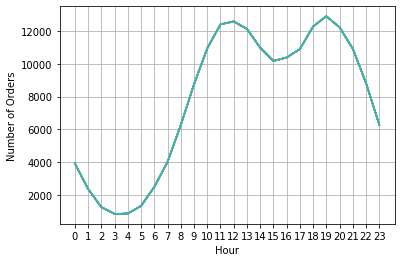

In [14]:
hours = all_data.groupby('Hour').sum()

plt.plot(hours.index, all_data.groupby(['Hour']).count())
plt.xticks(hours.index)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

### Task 6: What products are most often sold together?

In [31]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head(20)


c:\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,"34in Ultrawide Monitor,Google Phone"
225,176774,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,"iPhone,Lightning Charging Cable"


In [39]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### What product sold the most? and Why I think it sold the most?

In [48]:
product_grp = all_data.groupby('Product').sum()
quantity = product_grp[['Quantity Ordered']]
quantity

,Quantity Ordered
Product,
20in Monitor,4129
27in 4K Gaming Monitor,6244
27in FHD Monitor,7550
34in Ultrawide Monitor,6199
AA Batteries (4-pack),27635
AAA Batteries (4-pack),31017
Apple Airpods Headphones,15661
Bose SoundSport Headphones,13457
Flatscreen TV,4819


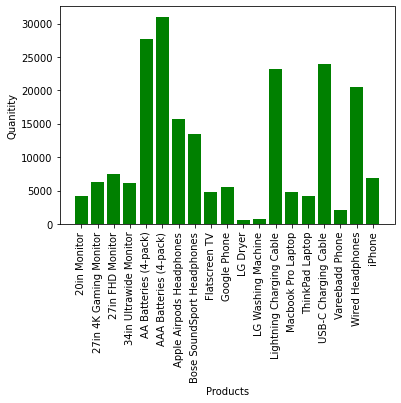

In [59]:
# Istogram Plot
products = quantity.index


plt.bar(products, quantity['Quantity Ordered'], color='GREEN')
plt.xticks(products,  rotation='vertical',)
plt.ylabel('Quanitity Ordered')
plt.xlabel('Products')
plt.show()

c:\python\python37\lib\site-packages\ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]
c:\python\python37\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


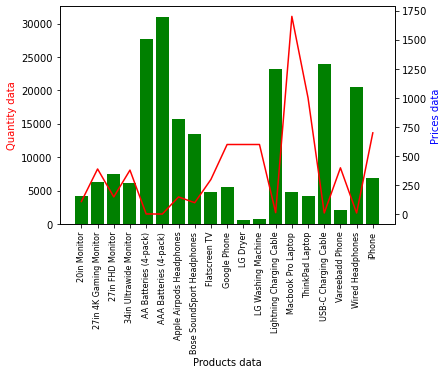

In [79]:
prices = all_data.groupby('Product').mean()['Price Each']


fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity['Quantity Ordered'], color='green')
ax2.plot(products, prices, 'red')

ax1.set_xlabel('Products data')
ax1.set_ylabel('Quantity data', color='red')
ax2.set_ylabel('Prices data', color='b')
ax1.set_xticklabels(products,  rotation='vertical', size=8)

fig.show()
